# Lab2 - Intro to stan

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
F = len("Mateusz")
L = len("Floras")

### Exercise 1 - Generated Quantities Block

In [3]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_1.stan to exe file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_1
INFO:cmdstanpy:compiled model executable: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_1.hpp /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_1.stan
Warning in '/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_1.stan', line 7, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-si

In [4]:
samples = gen_quant.sample(data={'M': F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
samples_df = samples.draws_pd()
samples_df.head()

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7]
0,0.0,0.0,56.2188,66.0,47.0,72.0,48.0,60.0,51.0,55.0
1,0.0,0.0,73.0865,84.0,76.0,87.0,70.0,74.0,60.0,93.0
2,0.0,0.0,409.3900,412.0,423.0,403.0,400.0,396.0,403.0,378.0
3,0.0,0.0,90.2341,92.0,90.0,93.0,82.0,80.0,81.0,113.0
4,0.0,0.0,37.9602,39.0,41.0,31.0,36.0,49.0,30.0,56.0


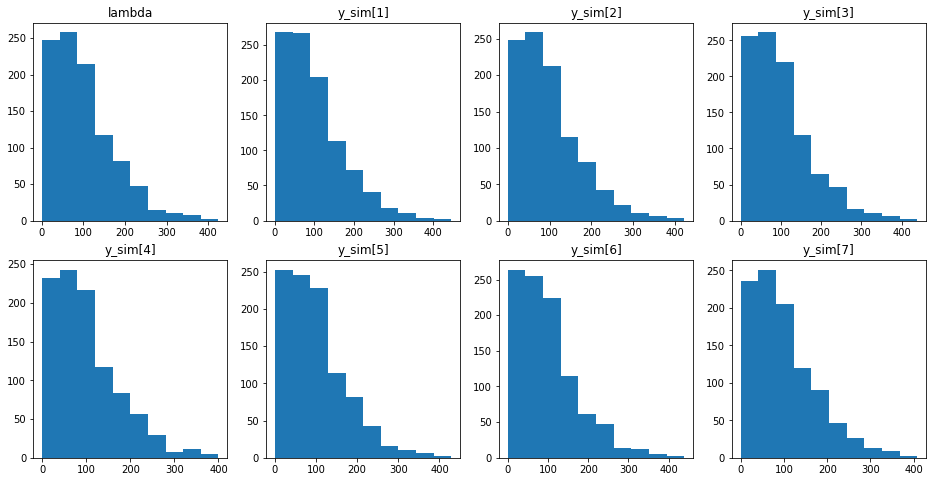

In [6]:
x = samples_df.iloc[:, 2:]

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for i in range(F+1):
    if i < 4:
        axs[0, i].hist(x.iloc[:, i])
        axs[0, i].set_title(x.columns[i])
    else:
        axs[1, i-4].hist(x.iloc[:, i])
        axs[1, i-4].set_title(x.columns[i])
plt.show()

### Excercise 2 - Constraints on the data

In [7]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0, 1]})

INFO:cmdstanpy:compiling stan file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_2.stan to exe file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_2
INFO:cmdstanpy:compiled model executable: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_2.hpp /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_2.stan
Warning in '/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_2.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-si


INFO:cmdstanpy:CmdStan done processing.


In [8]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:compiling stan file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_3.stan to exe file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_3
INFO:cmdstanpy:compiled model executable: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_3.hpp /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_3.stan
Warning in '/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_3.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-si


INFO:cmdstanpy:CmdStan done processing.


For both code_2 and code_3 it is needed to set constraints from [0, 1]. Otherwise the out of range errors are raised.

### Excercise 3 - constraints on the parameters

### Unconstrained parameters

In [9]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
print(out_gamma1.diagnose())

INFO:cmdstanpy:compiling stan file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_4.stan to exe file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_4
INFO:cmdstanpy:compiled model executable: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_4
INFO:cmdstanpy:created output directory: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/samples
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▊    | 00:00 Iteration: 3900 / 7000 [ 55%]  (Sampling)





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/samples/code_4-20230323002708_1.csv, /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/samples/code_4-20230323002708_2.csv, /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/samples/code_4-20230323002708_3.csv, /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/samples/code_4-20230323002708_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
9489 of 24000 (39.54%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat va

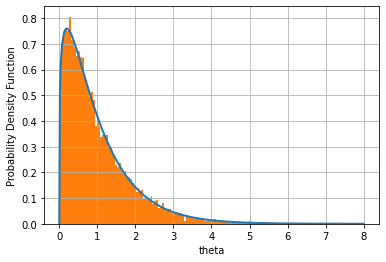

In [10]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins
out_gamma1.draws_pd()["theta"].hist(bins=160, density=True)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

### Constrained parameter

In [11]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
print(out_gamma2.diagnose())

INFO:cmdstanpy:compiling stan file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_5.stan to exe file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_5
INFO:cmdstanpy:compiled model executable: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▍      | 00:00 Iteration: 2200 / 7000 [ 31%]  (Sampling)







chain 1 |██████▉   | 00:00 Iteration: 4700 / 7000 [ 67%]  (Sampling)
chain 1 |█████████▎| 00:00 Iteration: 6400 / 7000 [ 91%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



Processing csv files: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/samples/code_5-20230323002718_1.csv, /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/samples/code_5-20230323002718_2.csv, /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/samples/code_5-20230323002718_3.csv, /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/samples/code_5-20230323002718_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
2 of 24000 (0.01%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values

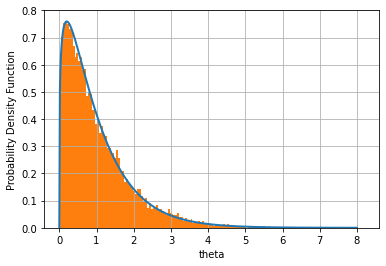

In [12]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins
out_gamma2.draws_pd()["theta"].hist(bins=160, density=True)
plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

If constraints are added as in code_5, the number of transitions ended with a divergence is very close to 0. Using code_4, this number is defintely greater because it is almost 40% of all transitions.

### Excercise 4 - Selection of parameters using equation solving

In [13]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 0.1

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:compiling stan file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_6.stan to exe file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_6
INFO:cmdstanpy:compiled model executable: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_6
--- Translating Stan model to C++ code ---
bin/stanc  --o=/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_6.hpp /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_6.stan
Warning in '/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_6.stan', line 3, column 45: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_6.st


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.52346


Standard deviation of half normal distribution, such that with 99% probability samples from it will be less than (F+L)/2 is equal to 2.52346.

### Excercise 5 - different methods of defining models

In [14]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 28042000 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:compiling stan file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_7.stan to exe file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_7
INFO:cmdstanpy:compiled model executable: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_7
--- Translating Stan model to C++ code ---
bin/stanc  --o=/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_7.hpp /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_7.stan
Warning in '/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_7.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-si


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status



chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


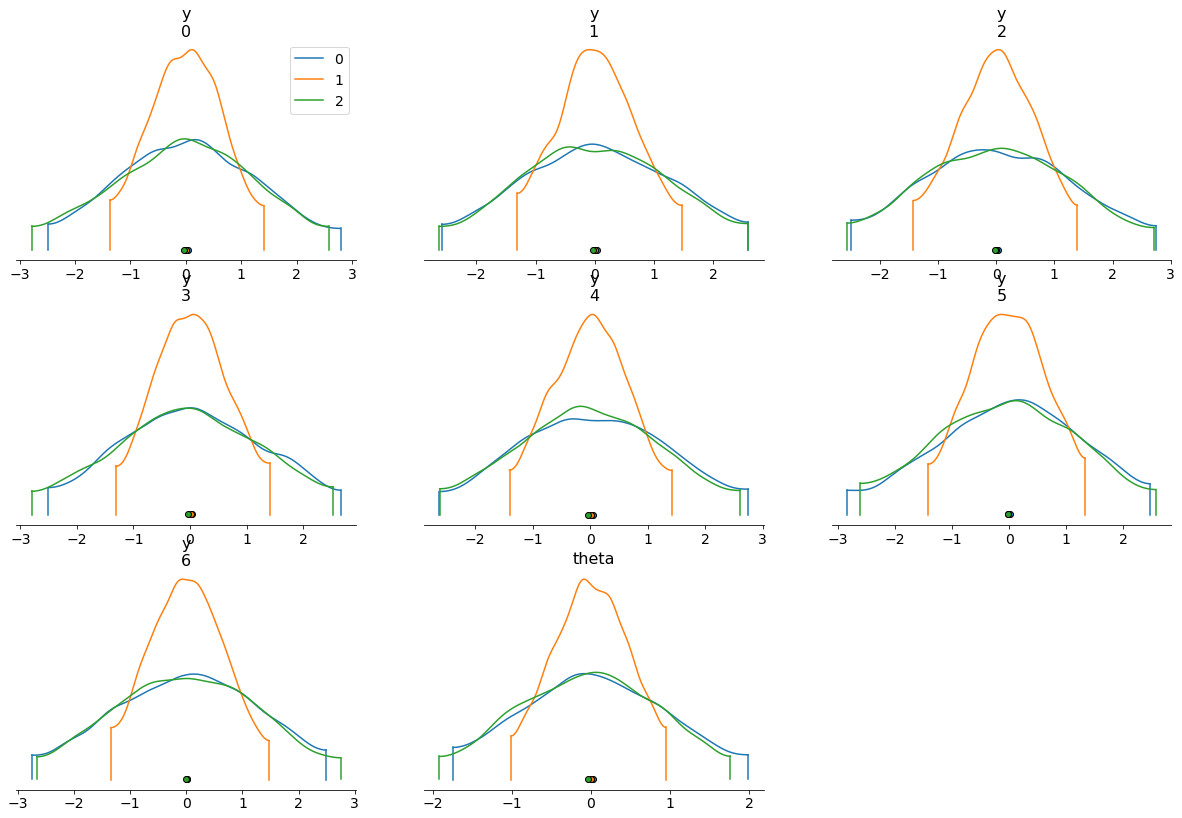

In [15]:
az.plot_density([result_1,result_2,result_3])
plt.show()

### Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:compiling stan file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_10.stan to exe file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_10
INFO:cmdstanpy:compiled model executable: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_10
--- Translating Stan model to C++ code ---
bin/stanc  --o=/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_10.hpp /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_10.stan
Warning in '/root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Lab_2/code_10.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -

array([[<AxesSubplot:title={'center':'mean_y'}>]], dtype=object)

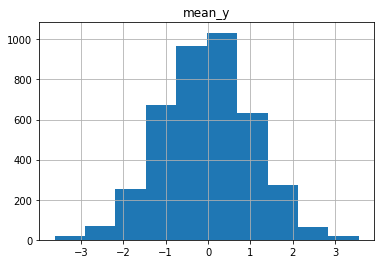

In [16]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variable
mean_y = mean_of_y.draws_pd()
mean_y.hist()